# FFT Review: Cleaning a Signal

Consider the following data:

{download}`signal.txt`

This contains data of a function polluted with noise.  We want to remove the noise to
recover the original function.  The three columns in the file are:
$t$, $f^\mathrm{(orig)}(t)$, and $f^\mathrm{(noisy)}(t)$.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = np.loadtxt("signal.txt")

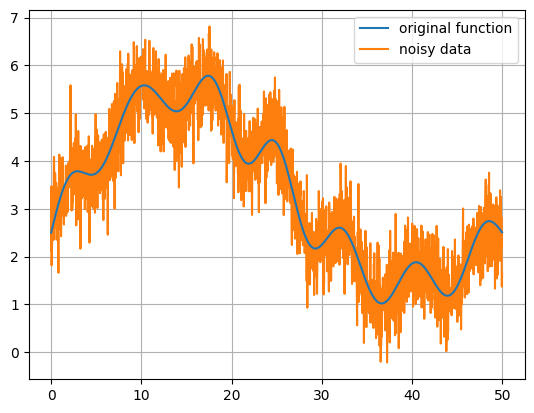

In [8]:
fig, ax = plt.subplots()
ax.plot(data[:, 0], data[:, 1], label="original function", zorder=100)
ax.plot(data[:, 0], data[:, 2], label="noisy data")
ax.grid()
ax.legend()

We will clean this by convolving the noisy data with a Gaussian.  

A convolution is defined as:

   $$(f \star g)(t) \equiv \int_{-\infty}^{\infty} f(\tau) g(t - \tau) d\tau$$

It is easy to compute this with FFTs, via the [_convolution theorem_](https://en.wikipedia.org/wiki/Convolution_theorem):

$$\mathcal{F}\{f \star g\} = \mathcal{F}\{f\} \, \mathcal{F}\{g\}$$

Here $\mathcal{F}\{\}$ indicates _taking the Fourier transform_.
That is the Fourier transform of the convolution of $f$ and $g$ is simply
the product of the individual transforms of $f$ and $g$.  This allows us
to compute the convolution via multiplication in Fourier space and then take
the inverse transform, $\mathcal{F}^{-1}\{\}$, to recover the convolution
in real space:

$$f \star g = \mathcal{F}^{-1}\{ \mathcal{F}\{f\} \, \mathcal{F}\{g\}\}$$

Let's consider our function $g(t)$ to be a Gaussian (we'll call this the kernel):

$$g(t) = \frac{1}{\sigma \sqrt{2 \pi}}\, e^{-\frac{1}{2} (t/\sigma)^2}$$

```{important}
This kernel is normalized such that the integral under it is 1.  This ensures that
we don't introduce a vertical shift in the data when we convolve.
```

We want to do the following:

  * Make the kernel periodic on the domain defined by the $t$ in
    the `signal.txt` file.

    ```{tip}
    You can do this simply by left-right
    flipping the definitions above and applying them at the far end of
    the domain.
    ```

    ```{important} 
    Make sure that your kernel function is normalized by ensuring
    that it sums to $1$ on the domain.  You might need to sum up the
    values and divide by the sum.
    ```

  * Take the FFT (or DFT) of $f^\mathrm{(noisy)}(t)$ and the FFT of the kernel and
    plot them.

  * Compute the convolution of $f^\mathrm{(noisy)}(t)$ and $g(x)$
    in Fourier space and transform back to real space, and plot the
    _de-noised_ function together with the original signal from
    the `signal.txt` (i.e., $f^\mathrm{(orig)}(t)$).

  * Experiment with the tunable parameter, $\sigma$,
    to see how clean you can get the noisy data and comment on what you see.


In [35]:
t = data[:, 0]
original = data[:, 1]
signal = data[:, 2]

Let's define our Gaussian function.  We want it centered at $t = 0$, but we also
need it to be periodic in the domain, so we will flip it and sum and normalize:

In [36]:
def gaussian(t, sigma=0.5):
    """ a gaussian kernel """

    g = 1.0/(sigma*np.sqrt(2.0*np.pi))*np.exp(-0.5*(t/sigma)**2)
    g = g[:] + g[::-1]
    gsum = np.sum(g)
    return g/gsum

In [37]:
kernel = gaussian(t)

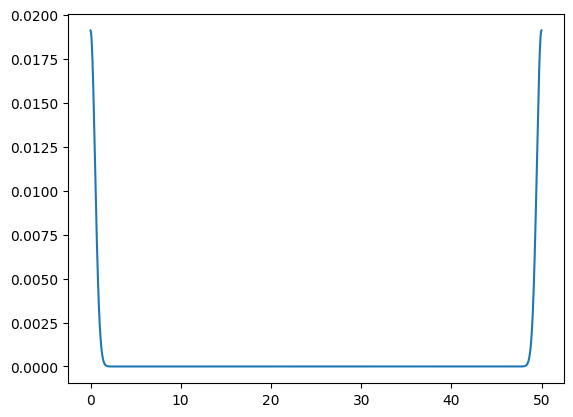

In [38]:
fig, ax = plt.subplots()
ax.plot(t, kernel)

Now let's take the FFT of our signal and kernel

Next compute the convolution in frequency space

In [31]:
conv = fft_signal * fft_kernel

Finally convert back to real space---note we only care about the real part

Let's plot the smoothed signal and the original to see how we did

```{note}
  This process is used a lot in image processing both to remove noise
  and to compensate for the behavior of cameras to sharpen images.  In image processing
  programs, this is what is done in the _Gaussian blur_ transform.
```